# Aufgabe 2: Histogramme linearisieren
Damit der zur Verfügung stehende Grauwertbereich optimal ausgenutzt wird, kann das Histogramm eines Bildes linearisiert werden.
Dadurch wird der Kontrast verstärkt und das Bild qualitativ besser.
Bei der Linearisierung wird die Quantisierungskennlinie optimal an die in einem Bild auftretenden Helligkeitswerte angepasst, d.h. Bereiche mit seltenen Grauwerten werden im Histogramm enger "zusammengerückt", Bereiche mit häufigen Grauwerten werden gestreckt:

![Darstellung der kumulierten Histogramme](figures/histogram.svg "Histogrammlinearisierung: Darstellung der kumulierten Histogramme")

Um das Histogramm eines Bildes zu linearisieren, wird zunächst das kumulierte Histogramm
\begin{align}
 h_c(I) = \sum_{i=0}^I h(i).
\end{align}
berechnet, das zu jedem Grauwert $I$ die Häufigkeit von Intensitäten unterhalb dieses Grauwertes angibt.
Jedem Pixel im Bild mit dem Grauwert $I$ wird dann ein neuer Grauwert $I' = h_c(I)$ zugewiesen, wobei eine Skalierung der Werte von $h_c$ auf den Wertebereich der Grauwerte vorgenommen wird.

Schreiben Sie eine Python-Funktion, die die Histogrammlinearisierung auf Grauwertbildern durchführt!
Testen Sie diese auf den im Ordner `Bilder` bereitgestellten Beispielbildern!

## 0. Pfade, Pakete etc.

In [1]:
import glob
import urllib.request

%matplotlib notebook
import matplotlib.pyplot as plt

import imageio
import numpy as np

import skimage
import time

In [2]:
image_filter = '../material/Bilder/*.jpg'

## 1. Laden des Bildes

In [3]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

## 2. Bestimmung des Histogrammes
Setzen Sie hier die Funktion `ex2_histogram` aus der vorherigen Übung ein:

In [4]:
def ex2_histogram(image):
    histogram = [0] * 256
    for j in range(0, image.shape[1]):
        for i in range(0, image.shape[0]):
            histogram[image[i, j]] += 1
    return histogram

## 3. Bestimmung des kumulierten Histogramms
Definieren Sie nun eine Funktion, die für ein gegebenes Bild das kumulierte Histogramm zurückgibt. Dabei soll die o.g. Funktion `ex2_histogram` verwendet werden.

In [5]:
def ex2_cumulative_histogram(image):
    histogram = ex2_histogram(image)
    cumulative_histogram = [0] * len(histogram)
    n = image.shape[0] * image.shape[1]
    for i in range(len(histogram)):
        cumulative_histogram[i] = np.sum(histogram[:i])
    # return the normalized cumulative histogram
    return cumulative_histogram / np.max(cumulative_histogram)

Nun werden das Histogramm und das kumulative Histogramm von den Funktionen berechnet:

In [6]:
image_histogram = ex2_histogram(image)
image_cumulative_histogram = ex2_cumulative_histogram(image)

<IPython.core.display.Javascript object>


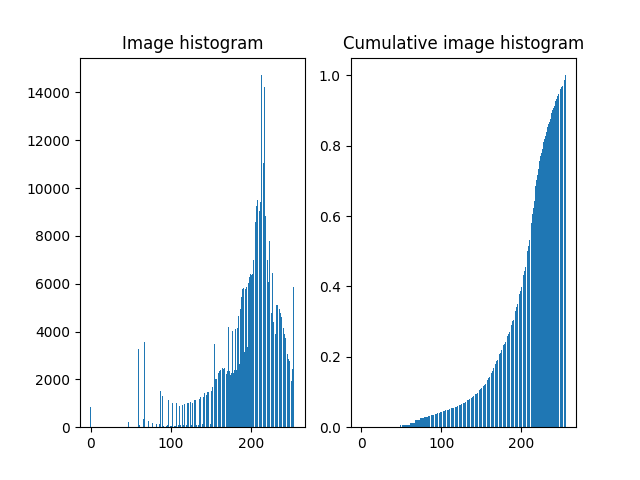

Text(0.5, 1.0, 'Cumulative image histogram')

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
axs[0].bar(np.arange(0, 256, 1), image_histogram)
axs[0].set_title('Image histogram')

axs[1].bar(np.arange(0, 256, 1), image_cumulative_histogram)
axs[1].set_title('Cumulative image histogram')

## 4. Histogrammlinearisierung
Im Folgenden soll eine Funktion definiert werden, die ein gegebenes Bild und ein kumulatives Histogramm verwendet, um die Histogrammlinearisierung auf dem Bild durchzuführen. Das linearisierte Bild soll zurückgegeben werden, ohne das Original zu verändern.

Initialisieren Sie zunächst ein leeres Bild mit Hilfe der Funktion `zeros_like` aus dem Paket `numpy`. Wenden Sie die Histogrammlinearisierung dann Pixel für Pixel an.

In [8]:
def ex2_histogram_linearization(image, cumulative_histogram):
    linearized_image = np.zeros_like(a=image)
    for j in range(0, image.shape[1]):
        for i in range(0, image.shape[0]):
            linearized_image[i, j] = np.round(cumulative_histogram[image[i, j]] * 255)
    return linearized_image

Die Funktion wird nun verwendet, um das Bild zu linearisieren:

In [9]:
linearized_image = ex2_histogram_linearization(image, image_cumulative_histogram)
linearized_image_cumulative_histogram = ex2_cumulative_histogram(linearized_image)

## 5. Darstellung
Um die Wirksamkeit der Histogrammlinearisierung zu überprüfen, stellen Sie zunächst die kumulativen Histogramme von `image` und `linearized_image` nebeneinander dar:

<IPython.core.display.Javascript object>


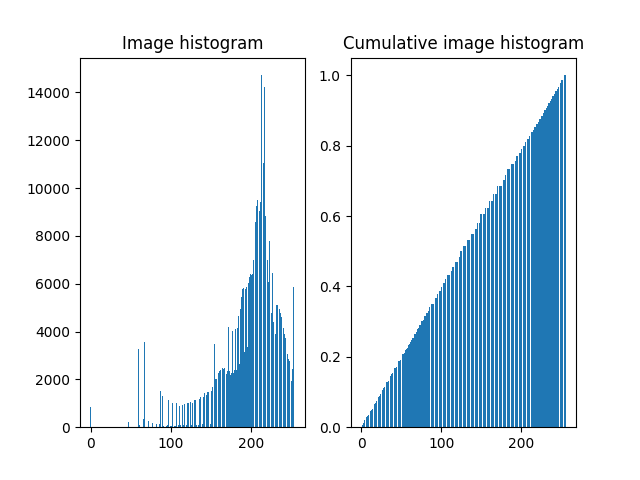

Text(0.5, 1.0, 'Cumulative image histogram')

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
axs[0].bar(np.arange(0, 256, 1), image_histogram)
axs[0].set_title('Image histogram')

axs[1].bar(np.arange(0, 256, 1), linearized_image_cumulative_histogram)
axs[1].set_title('Cumulative image histogram')

Vergleichen Sie nun die beiden Bilder, indem Sie sie nebeneinander anzeigen.

<IPython.core.display.Javascript object>


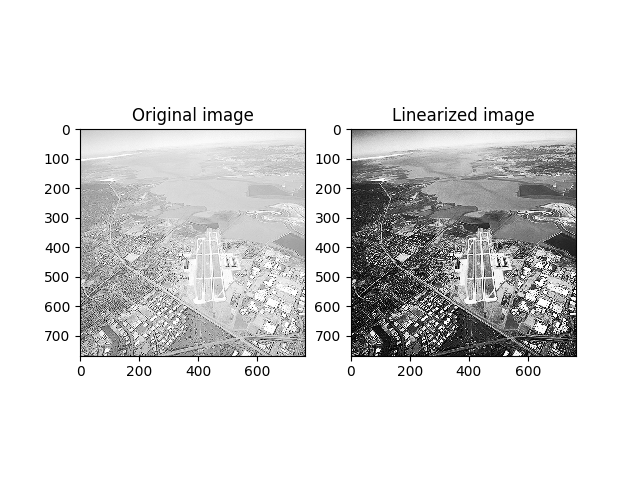

Text(0.5, 1.0, 'Linearized image')

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original image')


axs[1].imshow(linearized_image, cmap='gray')
axs[1].set_title('Linearized image')

# Aufgabe 6: Evaluation
Python bzw. das Paket `skimage` stellt eigene Routinen zur Histogrammlinerarisierung und Filterung zur Verfügung.
Informieren Sie sich über den Umgang mit diesen Funktionen und vergleichen Sie diese mit den von Ihnen implementierten Verfahren hinsichtlich der Ergebnisse und Laufzeiten! Tipp: Messen Sie die Laufzeit mit dem magischen Jupyter-Befehl `%time`!

In [12]:
from skimage import exposure

In [13]:
%%time
# computes the cumulative histogram with np.cumsum(histogram)
# scales the values with np.interp()
sk_equalized = exposure.equalize_hist(image)

CPU times: user 27.7 ms, sys: 6.22 ms, total: 34 ms
Wall time: 33.5 ms


In [14]:
%%time
linearized_image = ex2_histogram_linearization(image, image_cumulative_histogram)

CPU times: user 1.84 s, sys: 6.42 ms, total: 1.84 s
Wall time: 1.85 s


<IPython.core.display.Javascript object>


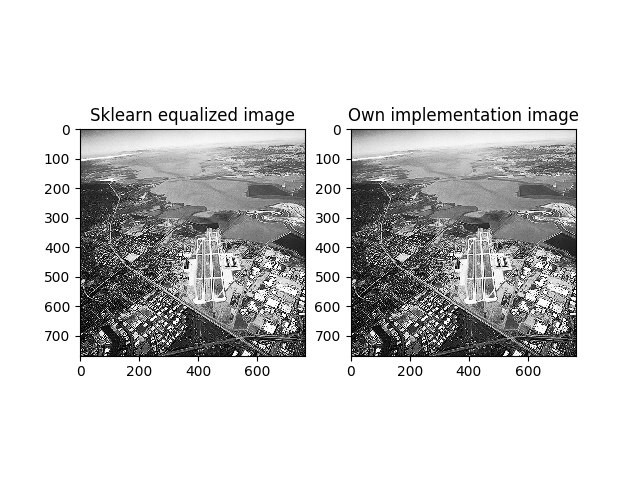

Text(0.5, 1.0, 'Own implementation image')

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
axs[0].imshow(sk_equalized, cmap='gray')
axs[0].set_title('Sklearn equalized image')


axs[1].imshow(linearized_image, cmap='gray')
axs[1].set_title('Own implementation image')

<IPython.core.display.Javascript object>


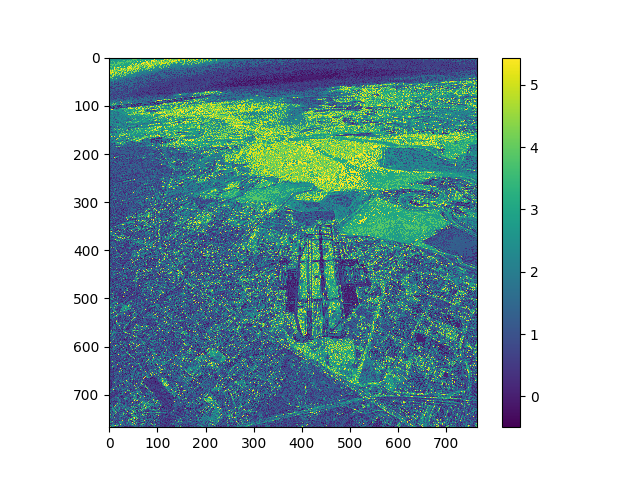

In [16]:
# plot the difference in images
plt.figure()
plt.imshow(sk_equalized * 255 - linearized_image)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


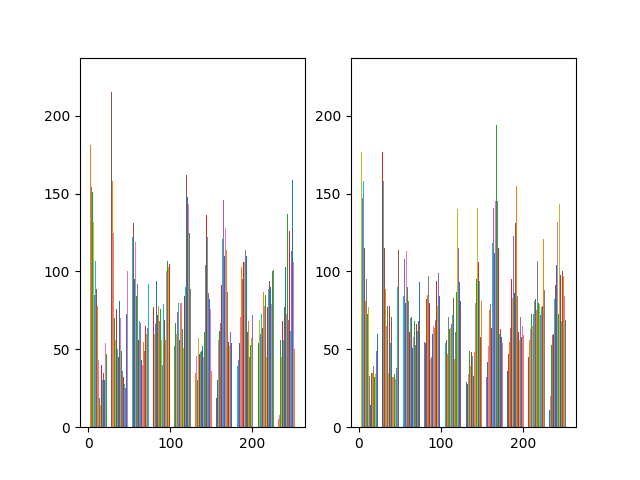

([array([190., 209., 110.,  68.,  45.,  26.,  21.,  36.,  52.,  11.]),
  array([176., 226., 106.,  84.,  42.,  17.,  33.,  30.,  49.,   5.]),
  array([178., 203., 110.,  78.,  44.,  24.,  31.,  31.,  56.,  13.]),
  array([175., 214., 117.,  82.,  41.,  14.,  25.,  43.,  48.,   9.]),
  array([201., 175., 132.,  77.,  42.,  14.,  32.,  34.,  50.,  11.]),
  array([195., 195., 110.,  80.,  43.,  19.,  19.,  40.,  58.,   9.]),
  array([192., 195.,  98.,  81.,  44.,  26.,  26.,  28.,  61.,  17.]),
  array([184., 202., 113.,  80.,  42.,  14.,  23.,  36.,  58.,  16.]),
  array([167., 202., 116.,  96.,  41.,  25.,  22.,  38.,  52.,   9.]),
  array([188., 172., 115.,  90.,  53.,  26.,  22.,  44.,  49.,   9.]),
  array([166., 214., 109.,  87.,  48.,  23.,  21.,  36.,  54.,  10.]),
  array([181., 183., 112.,  83.,  62.,  20.,  25.,  34.,  58.,  10.]),
  array([185., 199.,  99.,  85.,  56.,  25.,  24.,  35.,  51.,   9.]),
  array([202., 188., 102.,  78.,  51.,  20.,  32.,  35.,  51.,   9.]),
  arra

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
axs[0].hist(linearized_image)

axs[1].hist(sk_equalized * 255)